In [14]:
import numpy as np
from matplotlib import pyplot as plt

def V(x):
    return x * 0

def density(psi):
    return psi * np.conj(psi)

def gen_gaussian(x,x0,sigma, p0):
    A = (1 / (2 * np.pi * sigma**2))**(0.25)
    B = np.exp((-(x-x0)**2) / ((4 * sigma)**2))
    C = np.exp(1j*p0*x)
    return A * B * C

def normal(x,x0,sigma, p0):
    A = (1 / (2 * np.pi * sigma**2))**(0.25)
    B = np.exp((-(x-x0)**2) / ((4 * sigma)**2))
    C = np.exp(1j*p0*x)
    return A * B * C

def get_psi(psi,V):
    psi_next = np.zeros(N,dtype='cfloat')
    for i in range(1,len(psi)-1):
        # print(f'{psi[i]},{1j/2 * dt/dx**2 * (psi[i+1] - 2*psi[i] + psi[i-1])},{1j*dt*V(psi[i])*psi[i]}')
        psi_next[i] = psi[i] + (1j/2 * dt/dx**2 * (psi[i+1] - 2*psi[i] + psi[i-1])) - (1j*dt*V[i]*psi[i]) 
    return psi_next

In [20]:
N=300
x,dx = np.linspace(-30,30, N , retstep= True)
x.astype(complex)
dt = 1e-7

psi0 = gen_gaussian(x,x0 = 0 ,sigma= 2,p0=2)
psi1 = normal(x,x0 = 0 ,sigma= 2,p0= 0 )

psi00 = psi0.copy()
psi11 = psi1.copy()

for _ in range(10):
    psi00 = get_psi(psi00,V(x))
    psi11 = get_psi(psi11,V(x))

a = np.vstack((psi00,psi11))



In [27]:

# print(psi00 - psi11)


# print(density(psi0) - density(psi1) < 1e-7)

# plt.plot(x,density(psi0) , 'r')
# plt.plot(x,psi0.real , 'g')
# plt.plot(x,psi0.imag , 'b')
# plt.show()
# plt.plot(x,density(psi1))
# plt.plot(x,psi1.real ,)
# plt.plot(x,psi1.imag ,)
# plt.show()

alist = np.array([1,2,3,4,5,6,7,8,9])
# blist = np.array([2,3,4,5,6,7,8,9,10])
# ablist = np.vstack((alist,blist))
# print(ablist[1,:])




In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit
from scipy.linalg import eigh_tridiagonal


Nx = 301
Nt = 5000
dx = 1/(Nx-1)
dt=1e-7
x = np.linspace(0, 1, Nx)

psi0 = np.sqrt(2)*np.sin(np.pi*x)
# psi0 = gen_gaussian(x,x0 = 0 ,sigma= 2,p0=2)
mu, sigma = 1/2, 1/20
V = -1e4*np.exp(-(x-mu)**2/(2*sigma**2))

psi = np.zeros([Nt,Nx],dtype= 'cfloat')
psi[0] = psi0


@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

psi_m1 = compute_psi(psi.astype(complex))
# plt.plot(x, np.abs(psi_m1[4000])**2) 
plt.plot(x, density(psi[0]))
plt.plot(x, density(psi_m1[0]))
plt.plot(x, density(psi_m1[4000]))
plt.show()
plt.plot(x, V)

0.0

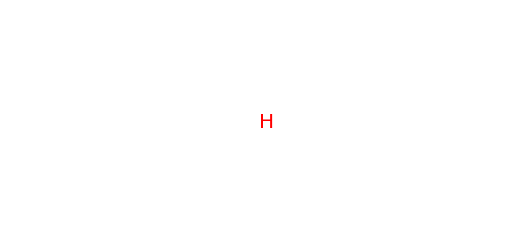

In [35]:
import os
from matplotlib import pyplot as plt, animation
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.set(xlim=(-1, 1), ylim=(-1, 1))
string = 'Hello, how are you doing?'
label = ax.text(0, 0, string[0], ha='center', va='center', fontsize=20, color="Red")

def animate(i):
   label.set_text(string[:i + 1]) 

anim = animation.FuncAnimation(
   fig, animate, interval=200, frames=len(string))
ax.axis('off')

file_format = 'gif'
file_name = 'test1'

directory = '/Users/Admin/Desktop/senior/animation'
output_file = os.path.join(directory, f'{file_name}.{file_format}')

anim.save(output_file, writer='pillow', fps=15)
plt.show()